In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd /content/drive/My Drive/ImageNet/

/content/drive/My Drive/ImageNet


In [3]:
from keras.applications.densenet import DenseNet121
dense_net_conv = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
from __future__ import print_function
import keras
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import models
from keras import layers
from keras import optimizers
import os

import numpy as np
X_train = np.load('/content/drive/My Drive/ImageNet/X_train_file.npy')
X_test = np.load('/content/drive/My Drive/ImageNet/X_test_file.npy')
y_test = np.load('/content/drive/My Drive/ImageNet/y_test_file.npy')
y_train = np.load('/content/drive/My Drive/ImageNet/y_train_file.npy')

batch_size = 128
num_classes = 200
epochs = 10


X_train.shape
X_train = X_train.reshape(-1)
X_train = X_train.reshape(100000, 32, 32, 3)
#X_train.shape

X_test.shape
X_test = X_test.reshape(-1)
X_test = X_test.reshape(10000, 32, 32, 3)
#X_test.shape



# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Create the model
model = models.Sequential()
 
# Add the densenet convolutional base model
model.add(dense_net_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(200, activation='softmax'))

# initiate Adam optimizer
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train Samples')
print(X_test.shape[0], 'test Samples')

train_history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)




100000 train Samples
10000 test Samples
Instructions for updating:
Use tf.cast instead.
Train on 100000 samples, validate on 10000 samples
Epoch 1/10
100000/100000 [==============================] - 284s 3ms/step - loss: 4.7411 - acc: 0.0505 - val_loss: 5.7974 - val_acc: 0.0406
Epoch 2/10
100000/100000 [==============================] - 236s 2ms/step - loss: 4.3481 - acc: 0.0899 - val_loss: 4.6958 - val_acc: 0.0625
Epoch 3/10
100000/100000 [==============================] - 236s 2ms/step - loss: 4.2331 - acc: 0.1045 - val_loss: 4.3370 - val_acc: 0.0937
Epoch 4/10
100000/100000 [==============================] - 236s 2ms/step - loss: 4.0588 - acc: 0.1274 - val_loss: 4.5161 - val_acc: 0.0815
Epoch 5/10
100000/100000 [==============================] - 236s 2ms/step - loss: 3.9863 - acc: 0.1383 - val_loss: 4.4380 - val_acc: 0.1005
Epoch 6/10
100000/100000 [==============================] - 236s 2ms/step - loss: 3.9438 - acc: 0.1459 - val_loss: 4.6768 - val_acc: 0.1007
Epoch 7/10
100000/100

NameError: ignored

In [8]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 15s 1ms/step
Test loss: 3.9043533977508544
Test accuracy: 0.1578


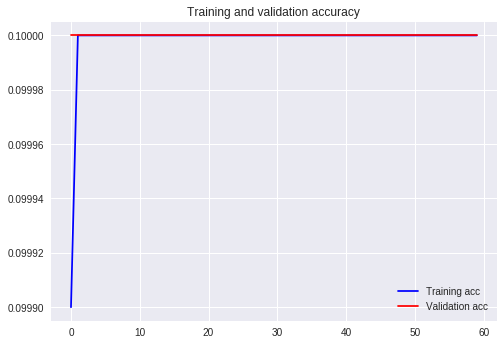

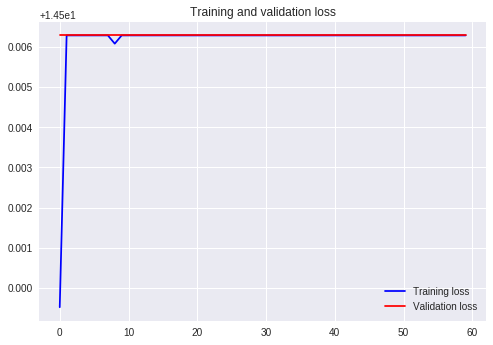

In [0]:
import matplotlib.pyplot as plt

acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()